# Import Required libraries

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import shutil
import os

# Creating functions to perform task

In [ ]:
# Function to log expense
def log_expense():
    try:
        # Attempt to load the existing file
        df = pd.read_csv('expenses.csv')
    except FileNotFoundError:
        # If file doesn't exist, create an empty DataFrame with specified columns
        df = pd.DataFrame(columns=['Name', 'Date', 'Amount', 'Description', 'Category'])
        df.to_csv('expenses.csv', index=False)
        print("File created. You can log the expense.")
    
    # Get expense details from the user
    name = input("Enter your name: ")
    date = input("Enter the date (dd-mm-yyyy): ")
    amount = float(input("Enter the amount: "))
    description = input("Enter the description: ")
    category = input("Enter the category: ")
    # Create a new DataFrame from the single row
    new_row = pd.DataFrame([{
        'Name': name, 
        'Date': date, 
        'Amount': amount, 
        'Description': description, 
        'Category': category
    }])
    # Append the new row DataFrame to the existing DataFrame
    if not df.empty:
        df = pd.concat([df, new_row], ignore_index=True)
    else:
        df = new_row
    # Save the updated DataFrame back to the CSV file
    df.to_csv('expenses.csv', index=False)
    print("Record stored.")

def expense_analysis():
    try:
        df=pd.read_csv('expenses.csv')
    except FileNotFoundError:
        print("No file found please create one")
        return
    else:
        total_df=df.groupby('Name')['Amount'].sum().reset_index()
        print('Total expense of each family member:')
        for _,j in total_df.iterrows():
            print(f"{j['Name']}: {j['Amount']}")
        avg=total_df['Amount'].mean()
        print(f"Average daily expense: {avg}")   

def expense_trend():
    try:
        df=pd.read_csv('expenses.csv')
    except FileNotFoundError:
        print("No file found please create one")
        return
    else:
        df['Date']=pd.to_datetime(df['Date'],errors='coerce',format='%d-%m-%Y')
        today=dt.datetime.now()
        f=(today.replace(day=1)-dt.timedelta(days=1)).replace(day=1)
        l=today.replace(day=1)-dt.timedelta(days=1)
        last_month_data=df[(df['Date']>=f)&(df['Date']<=l)].sort_values('Date')
        last_month_data['Day']=last_month_data['Date'].dt.day
        last_month_data['CumAmount']=last_month_data['Amount'].cumsum()
        plt.plot(last_month_data['Day'],last_month_data['CumAmount'])
        plt.title('Daily Cumulative Expense of last month')
        plt.xlabel('Day of previous month')
        plt.ylabel('Cumulative expense')
        plt.show()

def monthly_expense_report():
    try:
        # Load the expenses CSV file
        df = pd.read_csv('expenses.csv')
    except FileNotFoundError:
        print("No file found. Please create one.")
        return
    
    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
    
    # Create a new column for month and year
    df['Month-Year'] = df['Date'].dt.to_period('M')
    
    # Group by 'Month-Year', summing up the 'Amount' for each group
    monthly_data = df.groupby('Month-Year')['Amount'].sum().reset_index()
    
    # Convert 'Month-Year' back to a string for plotting
    monthly_data['Month-Year'] = monthly_data['Month-Year'].astype(str)
    
    # Plotting
    plt.bar(x=monthly_data['Month-Year'], height=monthly_data['Amount'])
    plt.title('Expenses Grouped by Month')
    plt.xlabel('Month-Year')
    plt.ylabel('Total Amount')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()
    
    # Group by 'Name' and 'Month-Year', summing up the 'Amount'
    monthly_report_1 = df.groupby(['Name', 'Month-Year'])['Amount'].sum().reset_index()
    monthly_report_1['Month-Year'] = monthly_report_1['Month-Year'].astype(str)  # Convert to string for file writing
    
    # Group by 'Category' for breakdown
    category_data = df.groupby('Category')['Amount'].sum().reset_index()
    
    # Write the report to a text file
    with open('monthly_expense_report.txt', 'w') as file:
        seen = set()
        file.write('Total Monthly Expense of Each Family Member:\n')
        for _, j in monthly_report_1.iterrows():
            if j['Name'] not in seen:
                file.write(f"\n{j['Name']}:\n")
                seen.add(j['Name'])
            file.write(f"{j['Month-Year']}: {j['Amount']}\n")  
        
        file.write("\nBreakdown of Expenses by Category:\n")
        for _, j in category_data.iterrows():
            file.write(f"{j['Category']}: {j['Amount']}\n") 
        
def set_budget():
    food=int(input('Food: '))
    dining=int(input('Dining: '))
    grocery=int(input('Grocery: '))
    travel=int(input('Travel: '))
    stationery=int(input('Stationery: '))
    with open('Budget.txt','w') as file:
        file.write('Set budget for following categories: ')
        file.write(f'Food: {food}\n')
        file.write(f'Dining: {dining}\n')
        file.write(f'Grocery: {grocery}\n')
        file.write(f'Travel: {travel}\n')
        file.write(f'Stationery: {stationery}\n')
    print('All budget set successfully')
    
def data_back_up():
    # Define source and destination paths
    source = '/Users/ronakpanchal/Desktop/Advanced Python Programming/APL Lab/Practical-9/expenses.csv'
    dest = '/Users/ronakpanchal/Desktop/Advanced Python Programming/APL Lab/backup/expenses_backup.csv'  # Ensure a specific file name for the backup
    
    # Check if the source file exists before trying to copy
    if os.path.exists(source):
        shutil.copy2(source, dest)  
        print('Backup has been taken successfully')
    else:
        print('Source file does not exist. Backup failed.')

def restore():
    # Define source and destination paths
    source = '/Users/ronakpanchal/Desktop/Advanced Python Programming/APL Lab/backup/expenses_backup.csv'
    dest = '/Users/ronakpanchal/Desktop/Advanced Python Programming/APL Lab/Practical-9/expenses.csv'
    
    # Check if the backup file exists before trying to restore
    if os.path.exists(source):
        shutil.copy2(source, dest)  # Use copy2 to preserve metadata
        print('Data from backup restored to original location')
    else:
        print('Backup file does not exist. Restore failed.')


# Main Function 

In [84]:
def main():
    while True:
        print('1.Log expense')
        print('2.generate expense analysis')
        print('3.View expense trend')
        print('4.generate monthly expense report')
        print('5.set category wise budget expense')
        print('6.Backup')
        print('7.restore')
        print('8.exit')
        choice=int(input('Enter the choice: '))
        match choice:
            case 1:
                log_expense()
            case 2:
                expense_analysis()
            case 3:
                expense_trend()
            case 4:
                monthly_expense_report()
            case 5:
                set_budget()
            case 6:
                data_back_up()
            case 7:
                restore()
            case 8:
                print('Shutting down')
                break
            case _:
                print('Invalid choice')
            

1.Log expense
2.generate expense analysis
3.View expense trend
4.generate monthly expense report
5.set category wise budget expense
6.Backup
7.restore
8.exit
Record stored.
1.Log expense
2.generate expense analysis
3.View expense trend
4.generate monthly expense report
5.set category wise budget expense
6.Backup
7.restore
8.exit
Total expense of each family member:
Ranjan: 3973.35
Rohit: 5077.78
Ronak: 6420.98
rohit: 13527.0
Average daily expense: 7249.7775
1.Log expense
2.generate expense analysis
3.View expense trend
4.generate monthly expense report
5.set category wise budget expense
6.Backup
7.restore
8.exit


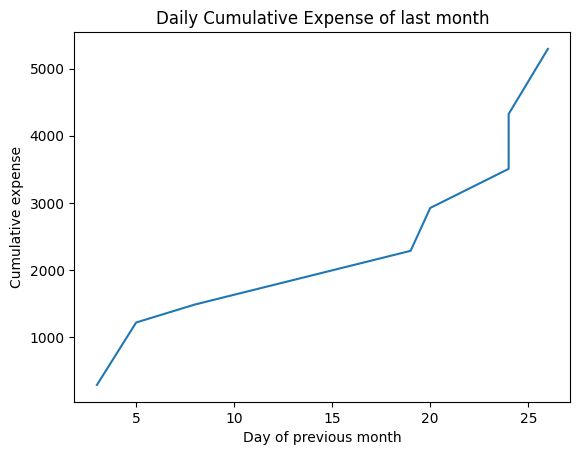

1.Log expense
2.generate expense analysis
3.View expense trend
4.generate monthly expense report
5.set category wise budget expense
6.Backup
7.restore
8.exit


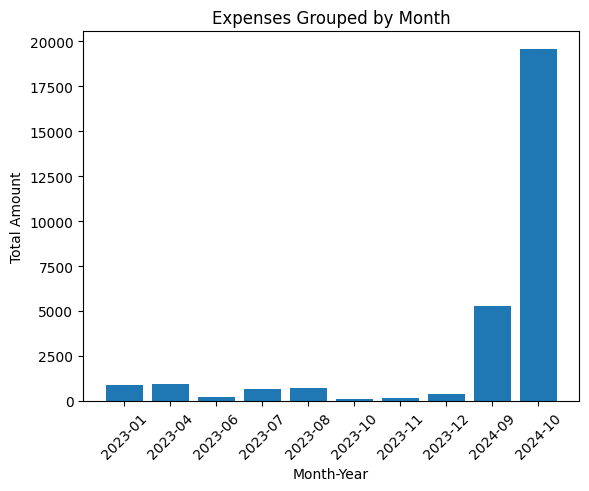

1.Log expense
2.generate expense analysis
3.View expense trend
4.generate monthly expense report
5.set category wise budget expense
6.Backup
7.restore
8.exit
Set budget for following categories: 
All budget set successfully
1.Log expense
2.generate expense analysis
3.View expense trend
4.generate monthly expense report
5.set category wise budget expense
6.Backup
7.restore
8.exit
Backup has been taken successfully
1.Log expense
2.generate expense analysis
3.View expense trend
4.generate monthly expense report
5.set category wise budget expense
6.Backup
7.restore
8.exit
Data from backup restored to original location
1.Log expense
2.generate expense analysis
3.View expense trend
4.generate monthly expense report
5.set category wise budget expense
6.Backup
7.restore
8.exit
Shutting down


In [86]:
if __name__ == '__main__':
    main()